In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer

import importlib
import utils
import networks

# change the default figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 16})

pinn_loss = pd.read_csv('test_final_performance/old_without_l2/pinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()
ipinn_loss = pd.read_csv('test_final_performance/old_without_l2/ipinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()

# PINN Weights difference

In [2]:
weights = [[0.5, 0.25, 0.25], [0.25, 0.5, 0.25], [0.25, 0.25, 0.5], [0.7, 0.15, 0.15], [0.15, 0.7, 0.15], [0.15, 0.15, 0.7], [1, 1, 1]]
n_epochs = 5000
key = 'Data_Loss'

def extract_data(model_type, key):
    hists = []
    for w in weights:
        all_loss_hist = []
        for j in range(1, 11):
            path = f'test_loss_weights/{model_type}/loss{j}/{w[0]}-{w[1]}-{w[2]}.csv'
            data = pd.read_csv(path)
            all_loss_hist.append(data[key].to_numpy())
        
        # Compute averages
        hists.append(pd.DataFrame(all_loss_hist).mean(axis=0))
    return hists
def plot_data(plot_hists, model_type, log=False):
    fig = plt.figure(figsize=(12,9))
    for idx, weight in enumerate(weights):
        hist_data = np.log(plot_hists[idx])
        if not log:
            num_epochs = 700 if model_type == 'PINN' else 500
            num_epochs = 5000 if key == 'PDE_Loss' else num_epochs
            plt.plot(range(num_epochs), hist_data[:num_epochs], label=f'w1: {weight[0]}, w2: {weight[1]}, w3: {weight[2]}')
        else:
            plt.plot(range(n_epochs), hist_data, label=f'w1: {weight[0]}, w2: {weight[1]}, w3: {weight[2]}')
    plt.xlabel('epochs')
    plt.ylabel('Logarithm Loss')
    plt.legend()
    plt.title(f'{model_type} Training {"logarithm " if log else ""}{key} Loss')
    plt.grid(True)
    # plt.savefig(f'test_loss_weights/plot/{model_type} Training {"logarithm " if log else ""}{key}.png', bbox_inches='tight')

pinn_hists = extract_data('pinn', key)
ipinn_hists = extract_data('ipinn', key)

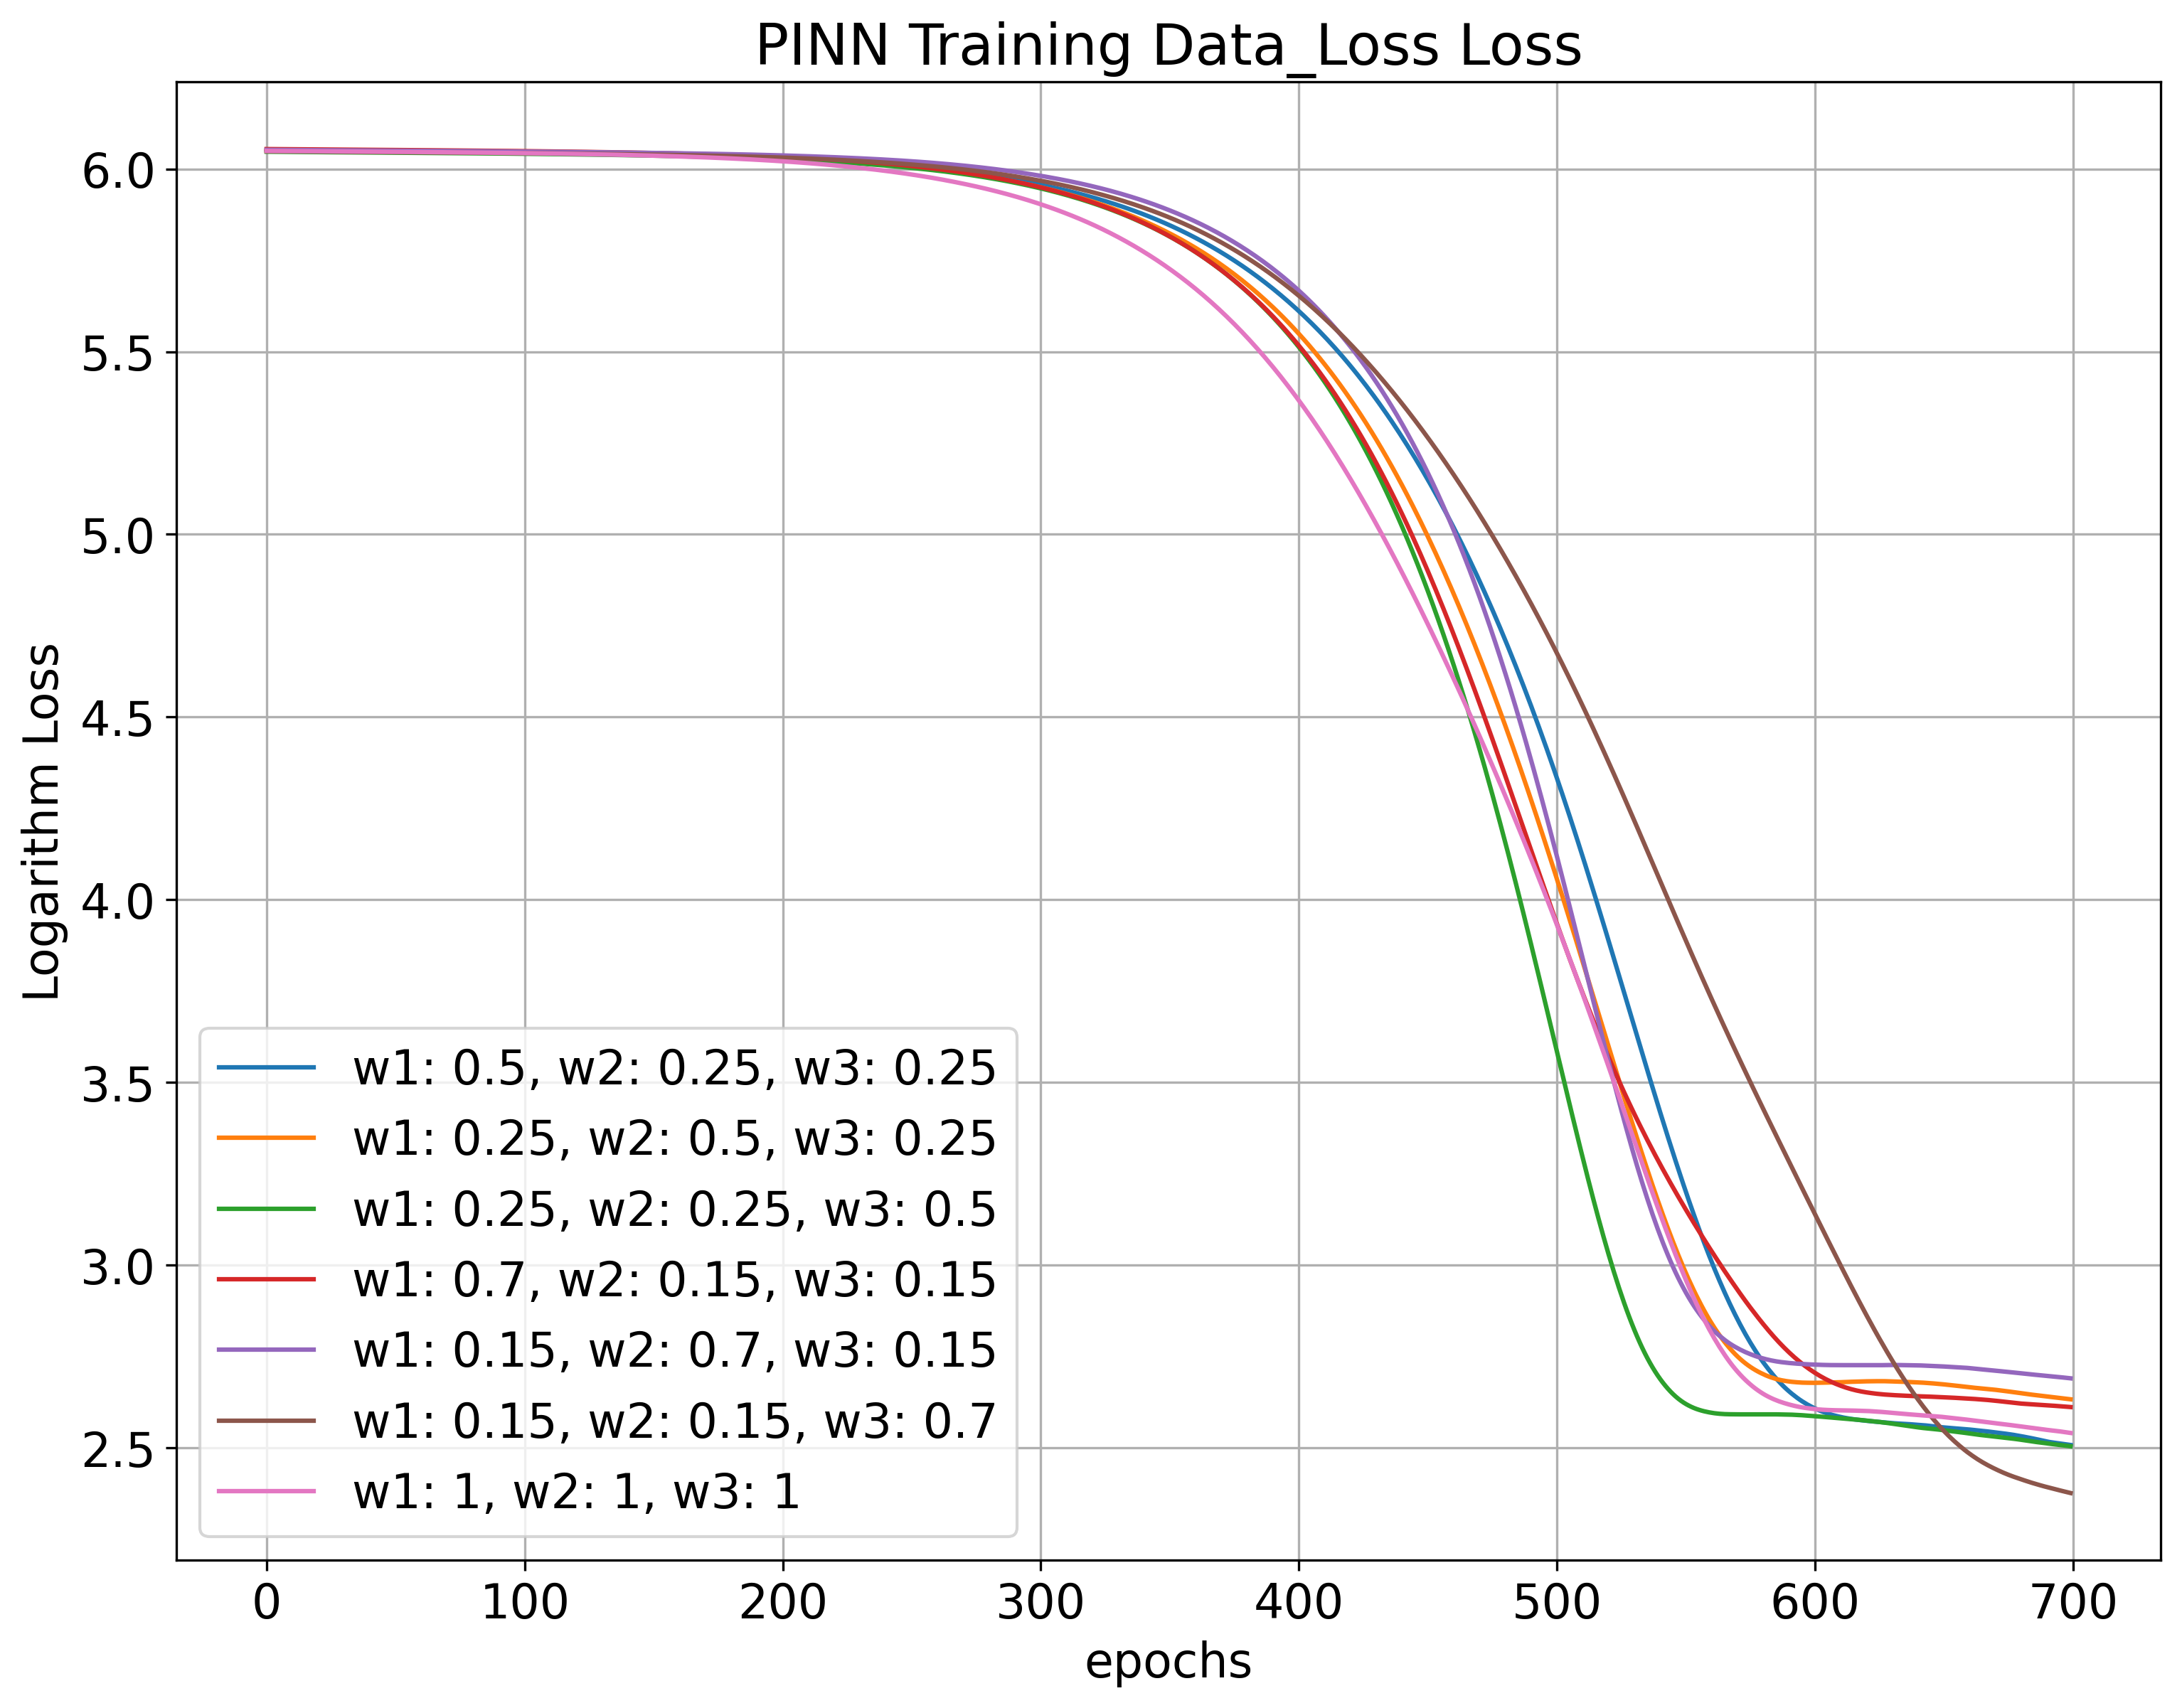

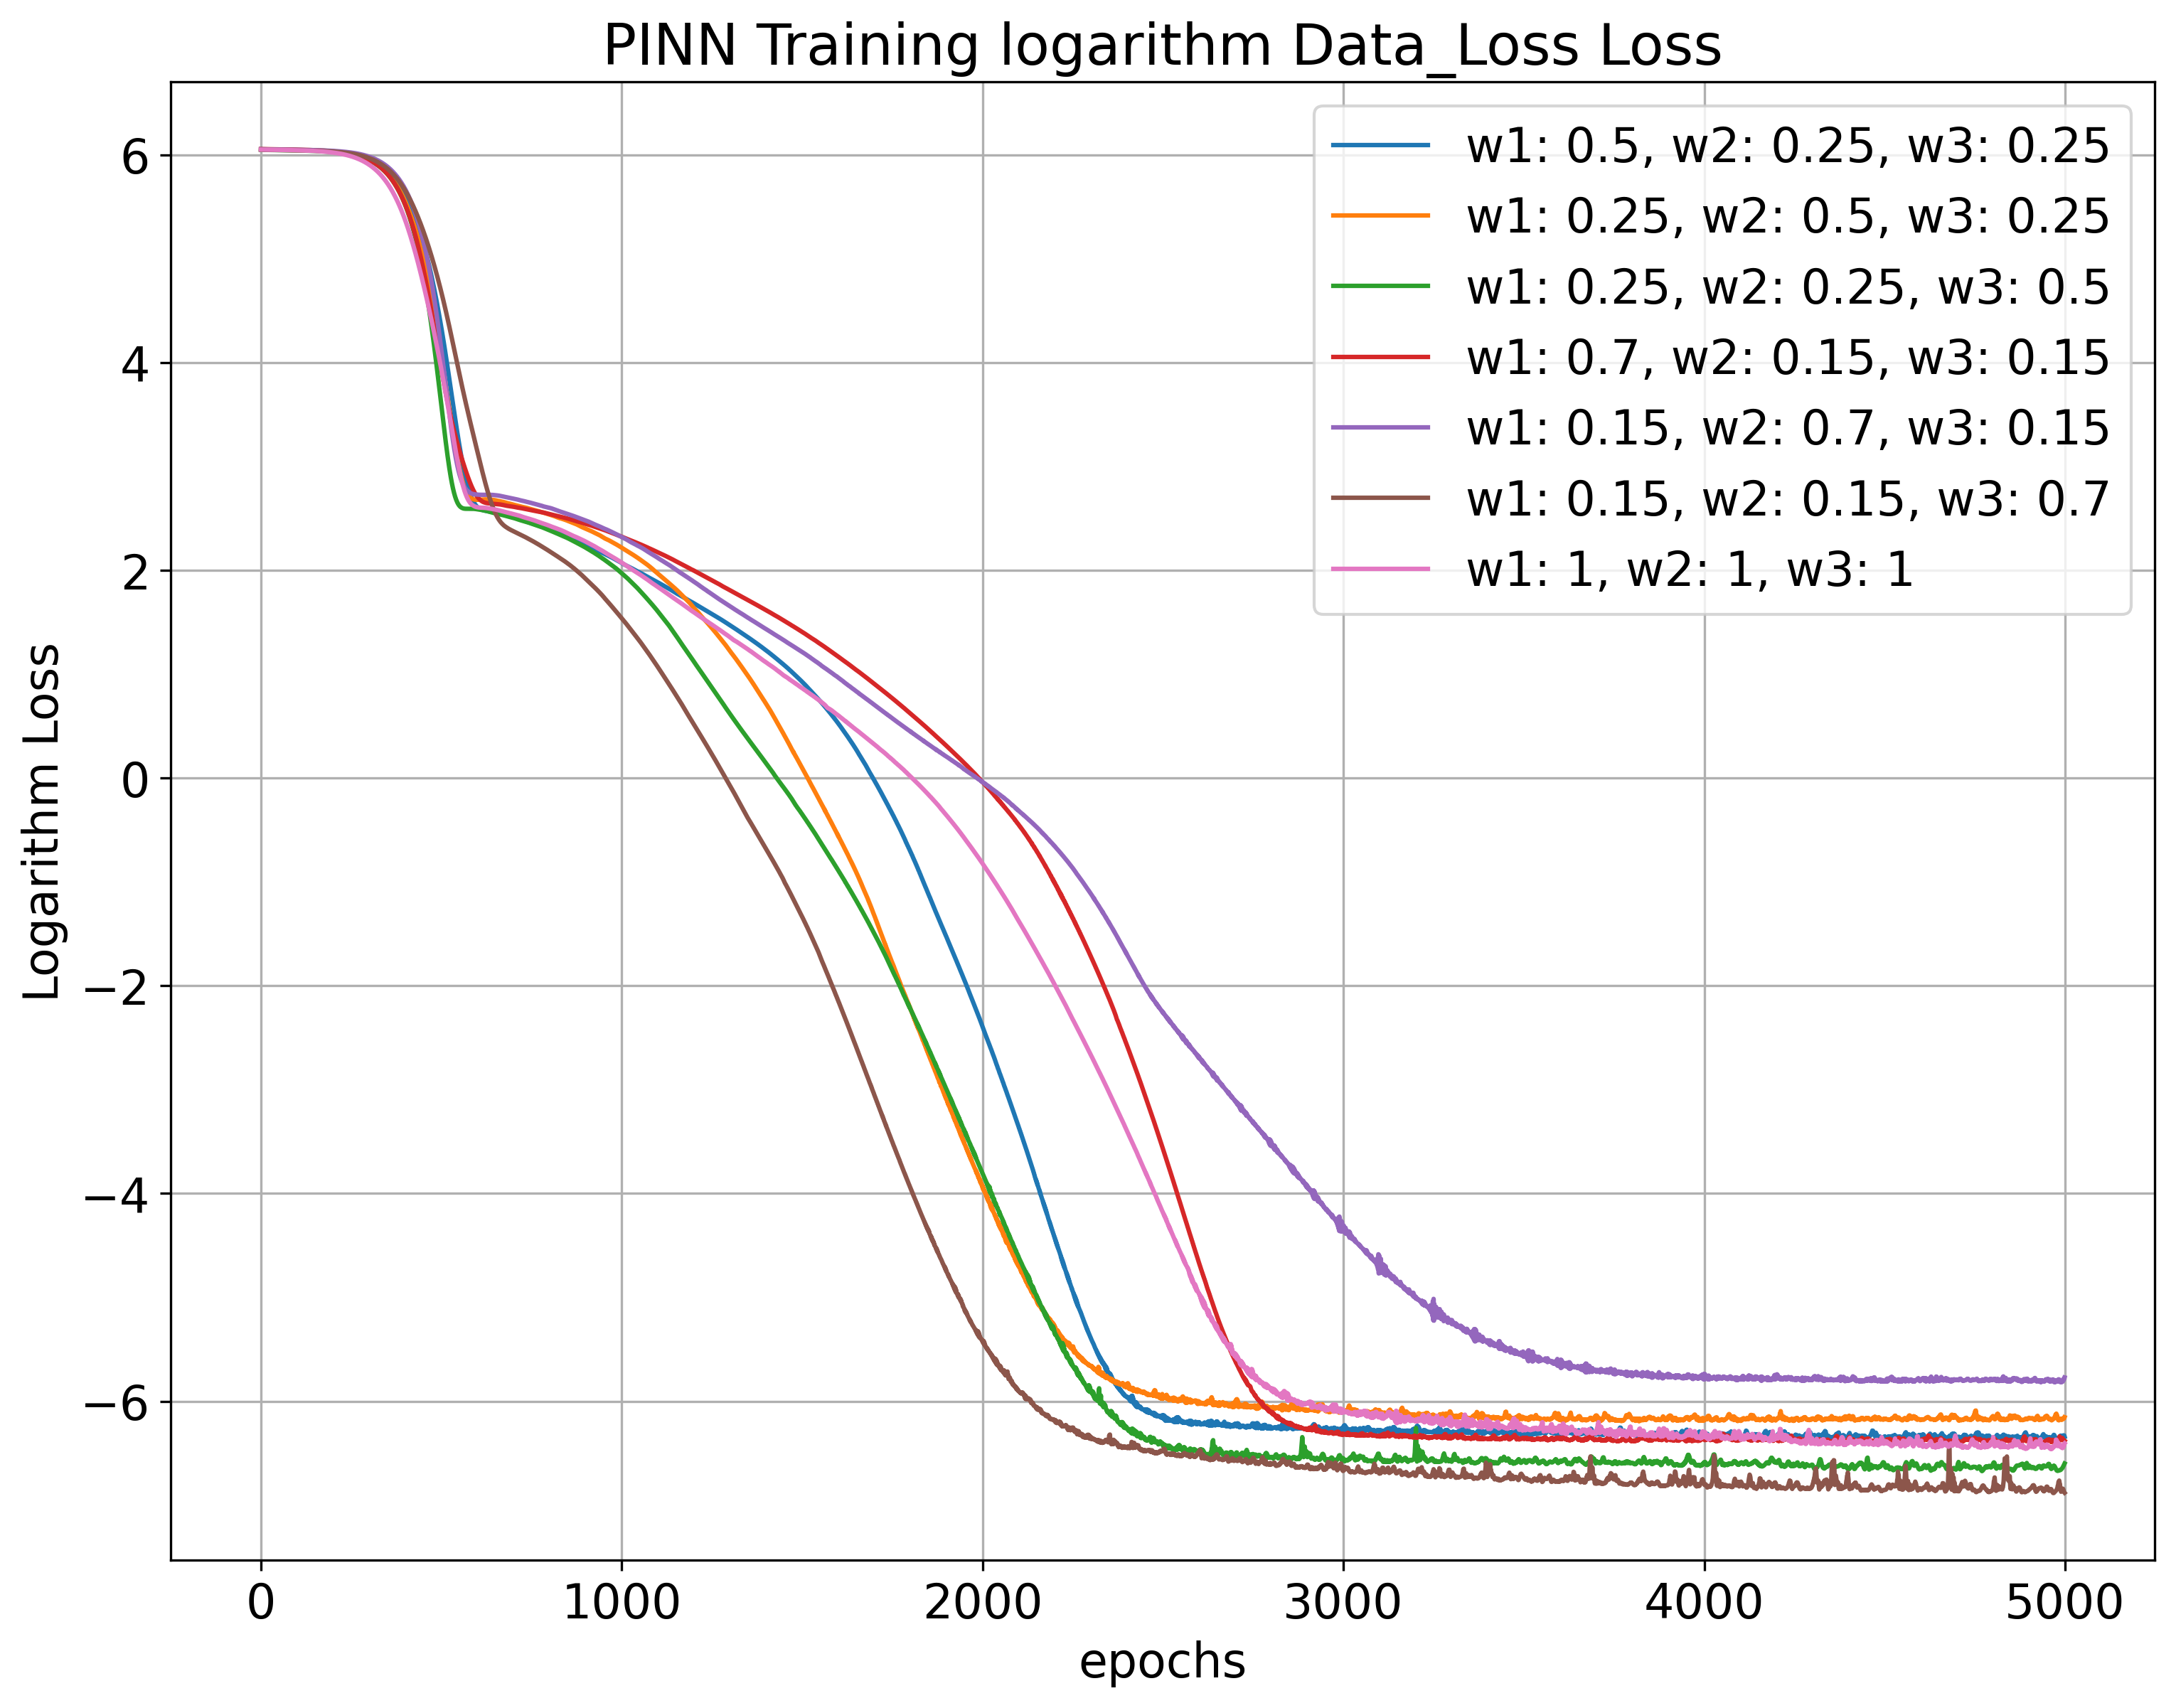

In [3]:
plot_data(pinn_hists, 'PINN')
plot_data(pinn_hists, 'PINN', log=True)

# IPINN Weight Difference

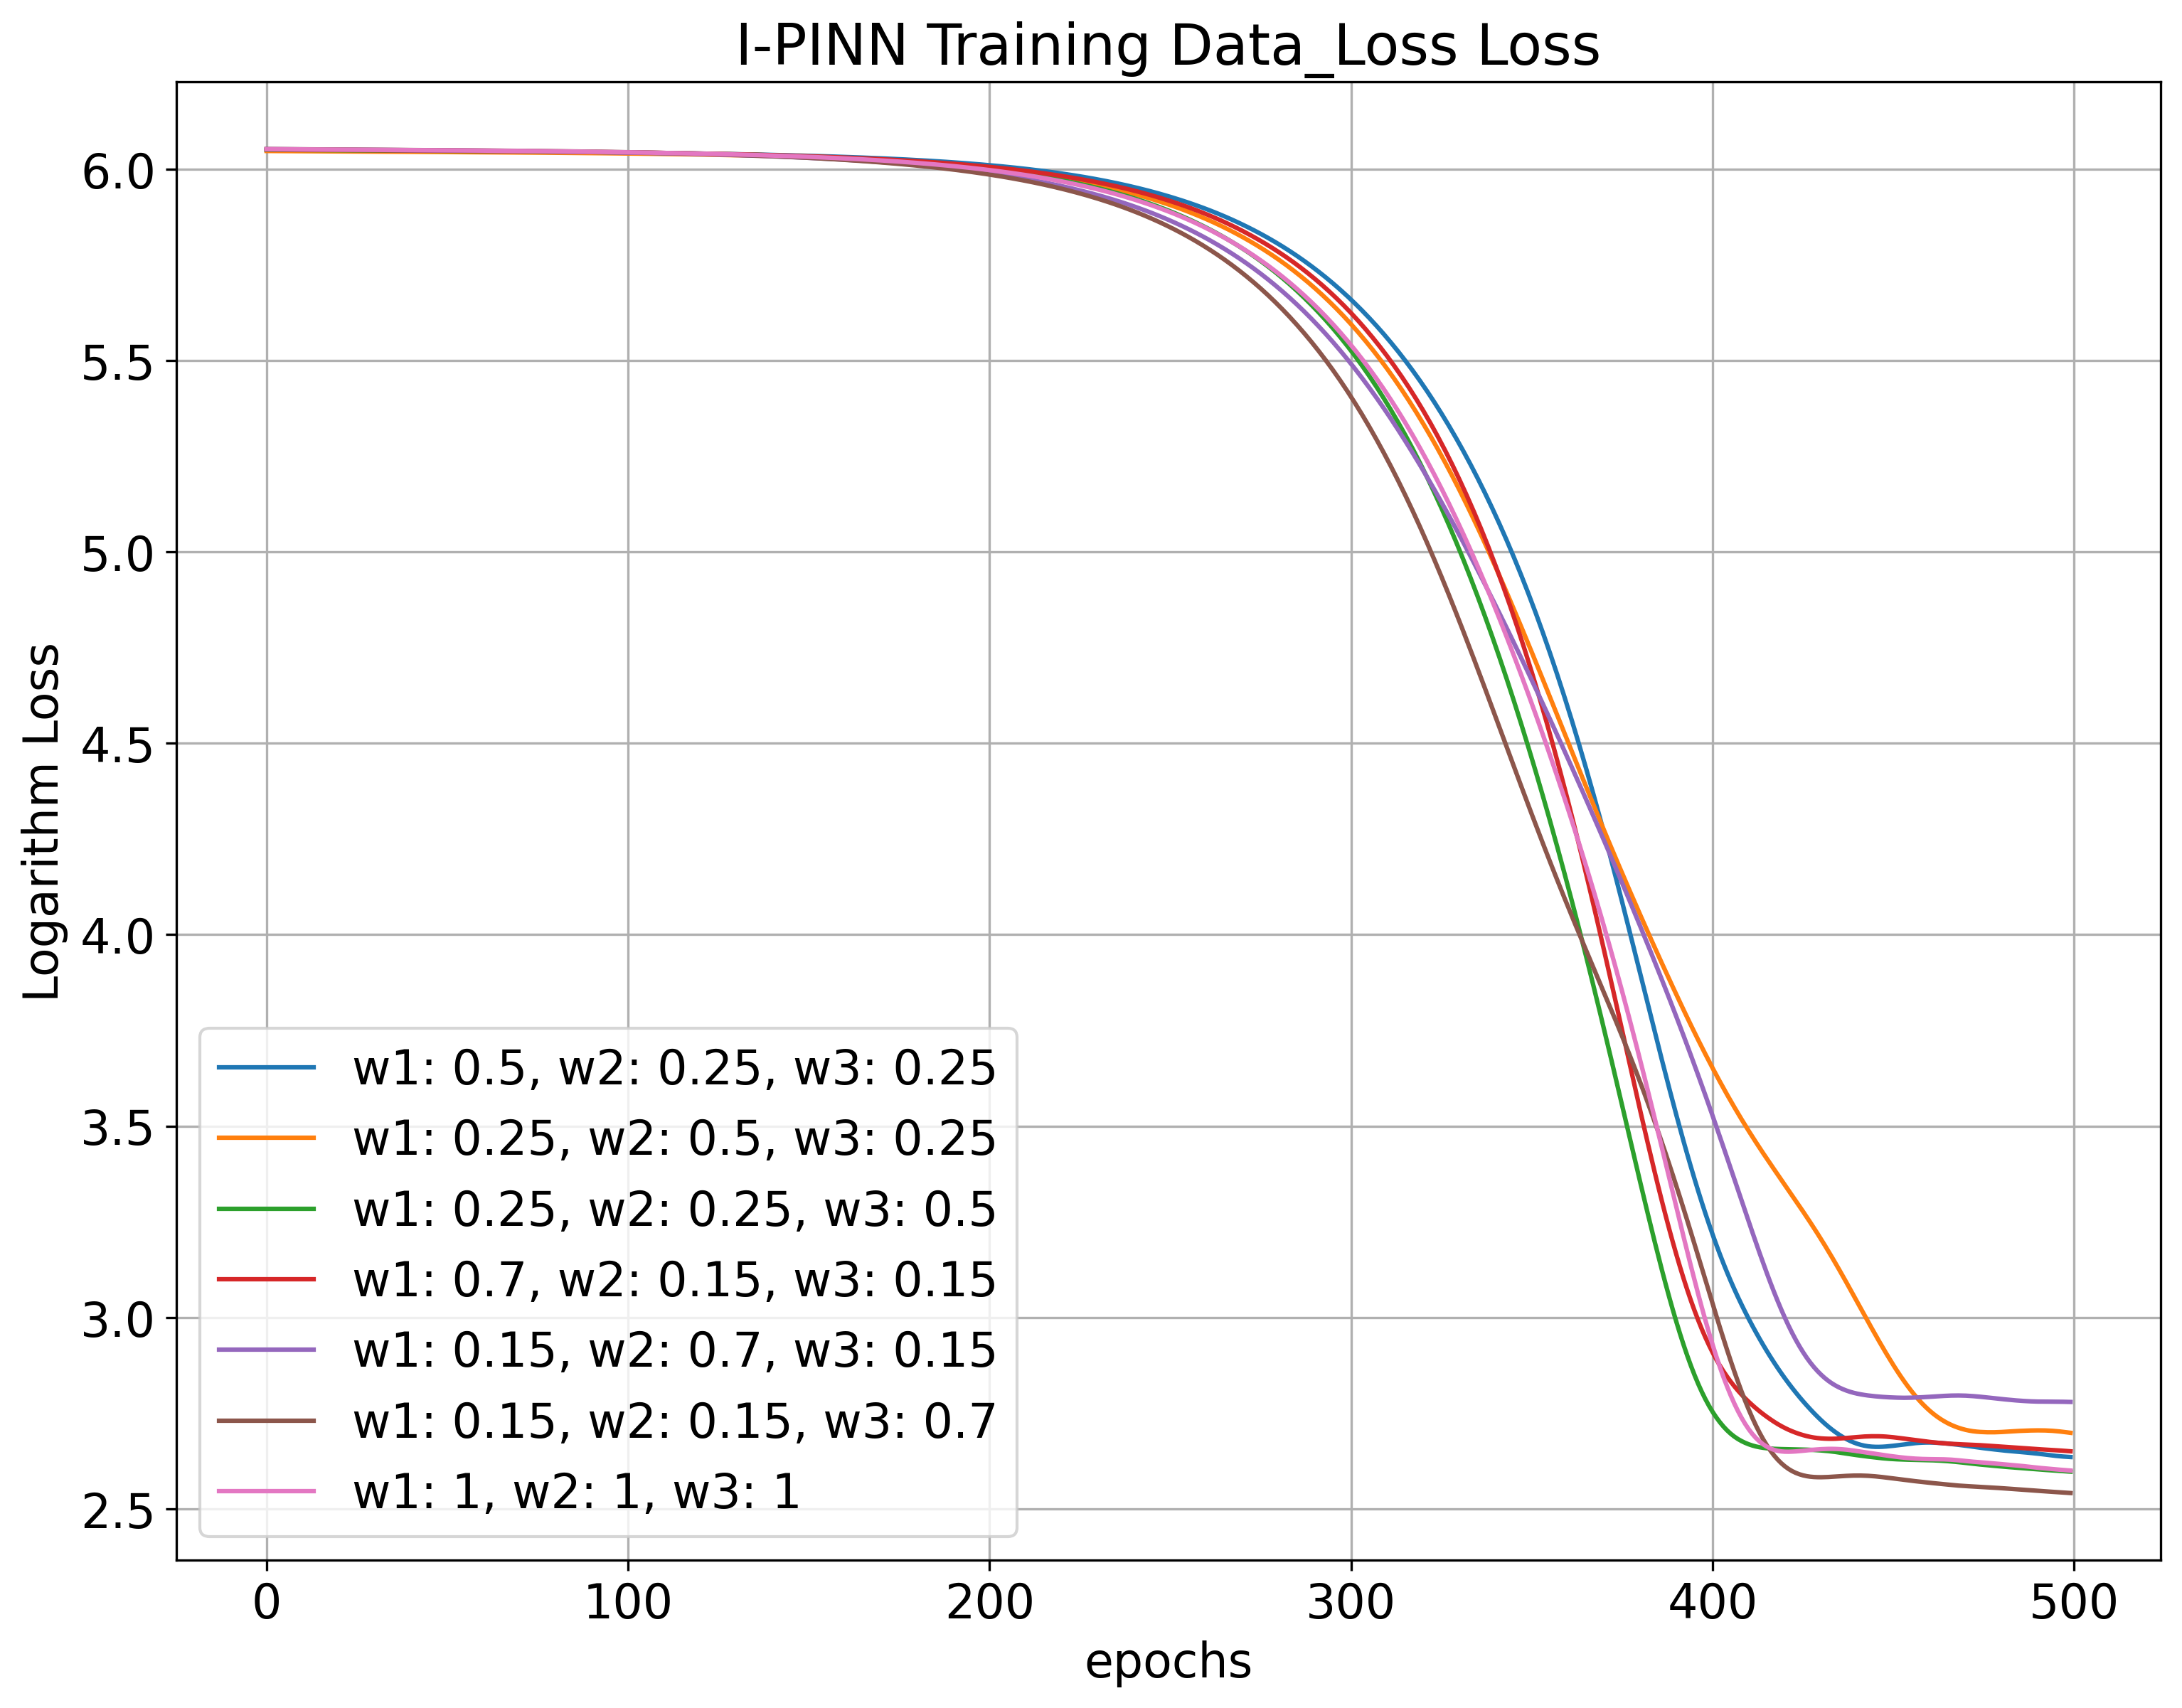

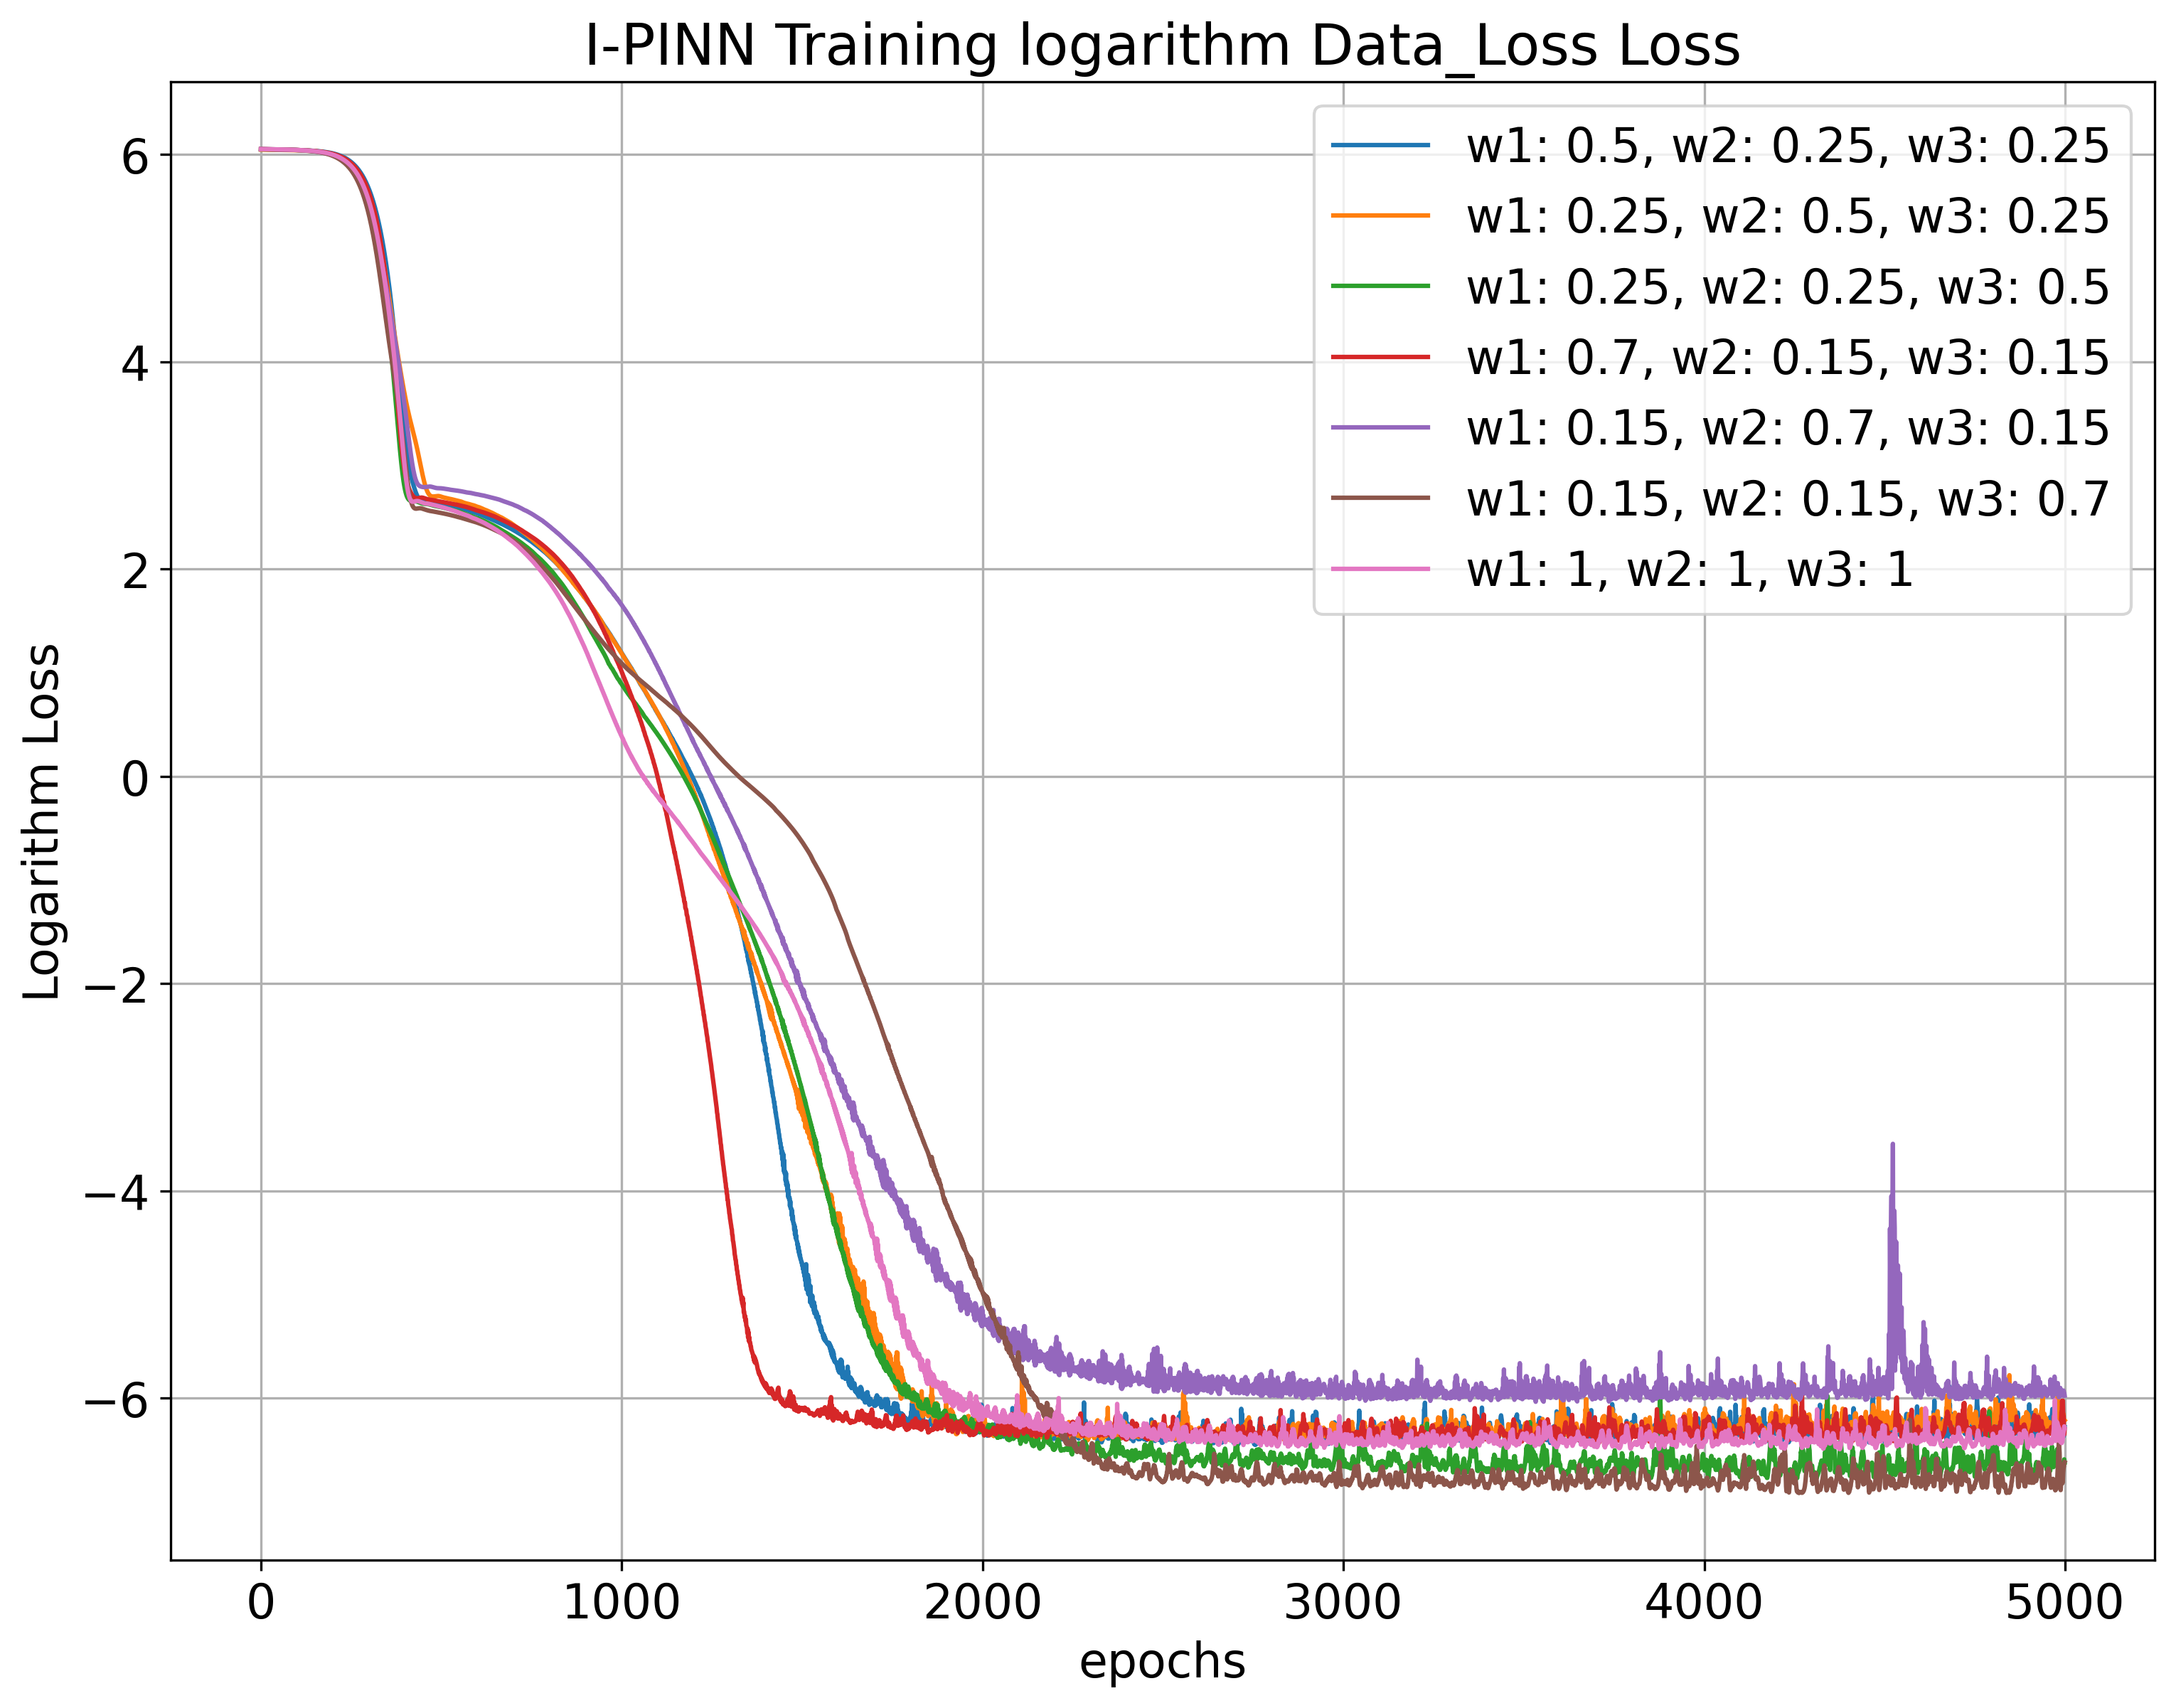

In [4]:
plot_data(ipinn_hists, 'I-PINN')
plot_data(ipinn_hists, 'I-PINN', log=True)

# AWPINN

In [5]:
n_epochs = 5000
key = 'PDE_Loss'  # Update this to whatever loss type you want

# Dictionary to store the configurations and their corresponding paths
configs = {
    '1-1-1': '1-1-1',
    '1-2-2': '1-2-2',
    '1-5-5': '1-5-5',
    '2-1-1': '2-1-1',
    # '1.5-1-1': '1.5-1-1',
    # '1-1-2': '1-1-2',
    '5-1-1': '5-1-1',
    # '1-2-1': '1-2-1'
}

# def average_losses_from_files(model_type, num_files=10):
#     """
#     Computes the average losses over multiple CSV files and saves the results to a new CSV file.
    
#     Parameters:
#     - file_prefix: Prefix to the filenames. Assumes filenames are in the format {file_prefix}{index}.csv.
#     - num_files: Number of files to process.
#     """
#     for config, path in configs.items():
#         # Lists to hold all losses
#         mse_losses, pde_losses, bc_losses, data_losses = [], [], [], []
        
#         # Loop over the file names
#         for i in range(num_files):
#             filename = f"test_loss_weights/{model_type}/{path}/loss/{i}.csv"
#             data = pd.read_csv(filename)

#             # Append losses from this file to the respective lists
#             mse_losses.append(data['MSE_Loss'].tolist())
#             pde_losses.append(data['PDE_Loss'].tolist())
#             bc_losses.append(data['BC_Loss'].tolist())
#             data_losses.append(data['Data_Loss'].tolist())

#         # Calculate the average losses
#         avg_mse_loss = pd.DataFrame(mse_losses).mean(axis=0).tolist()
#         avg_pde_loss = pd.DataFrame(pde_losses).mean(axis=0).tolist()
#         avg_bc_loss = pd.DataFrame(bc_losses).mean(axis=0).tolist()
#         avg_data_loss = pd.DataFrame(data_losses).mean(axis=0).tolist()

#         # Save the average losses to a new CSV file
#         result_df = pd.DataFrame({
#             'Average_MSE_Loss': avg_mse_loss,
#             'Average_PDE_Loss': avg_pde_loss,
#             'Average_BC_Loss': avg_bc_loss,
#             'Average_Data_Loss': avg_data_loss
#         })
        
#         result_df.to_csv(f"test_loss_weights/{model_type}/{path}/average.csv", index=False)

# # Call the function
# average_losses_from_files('awpinn')

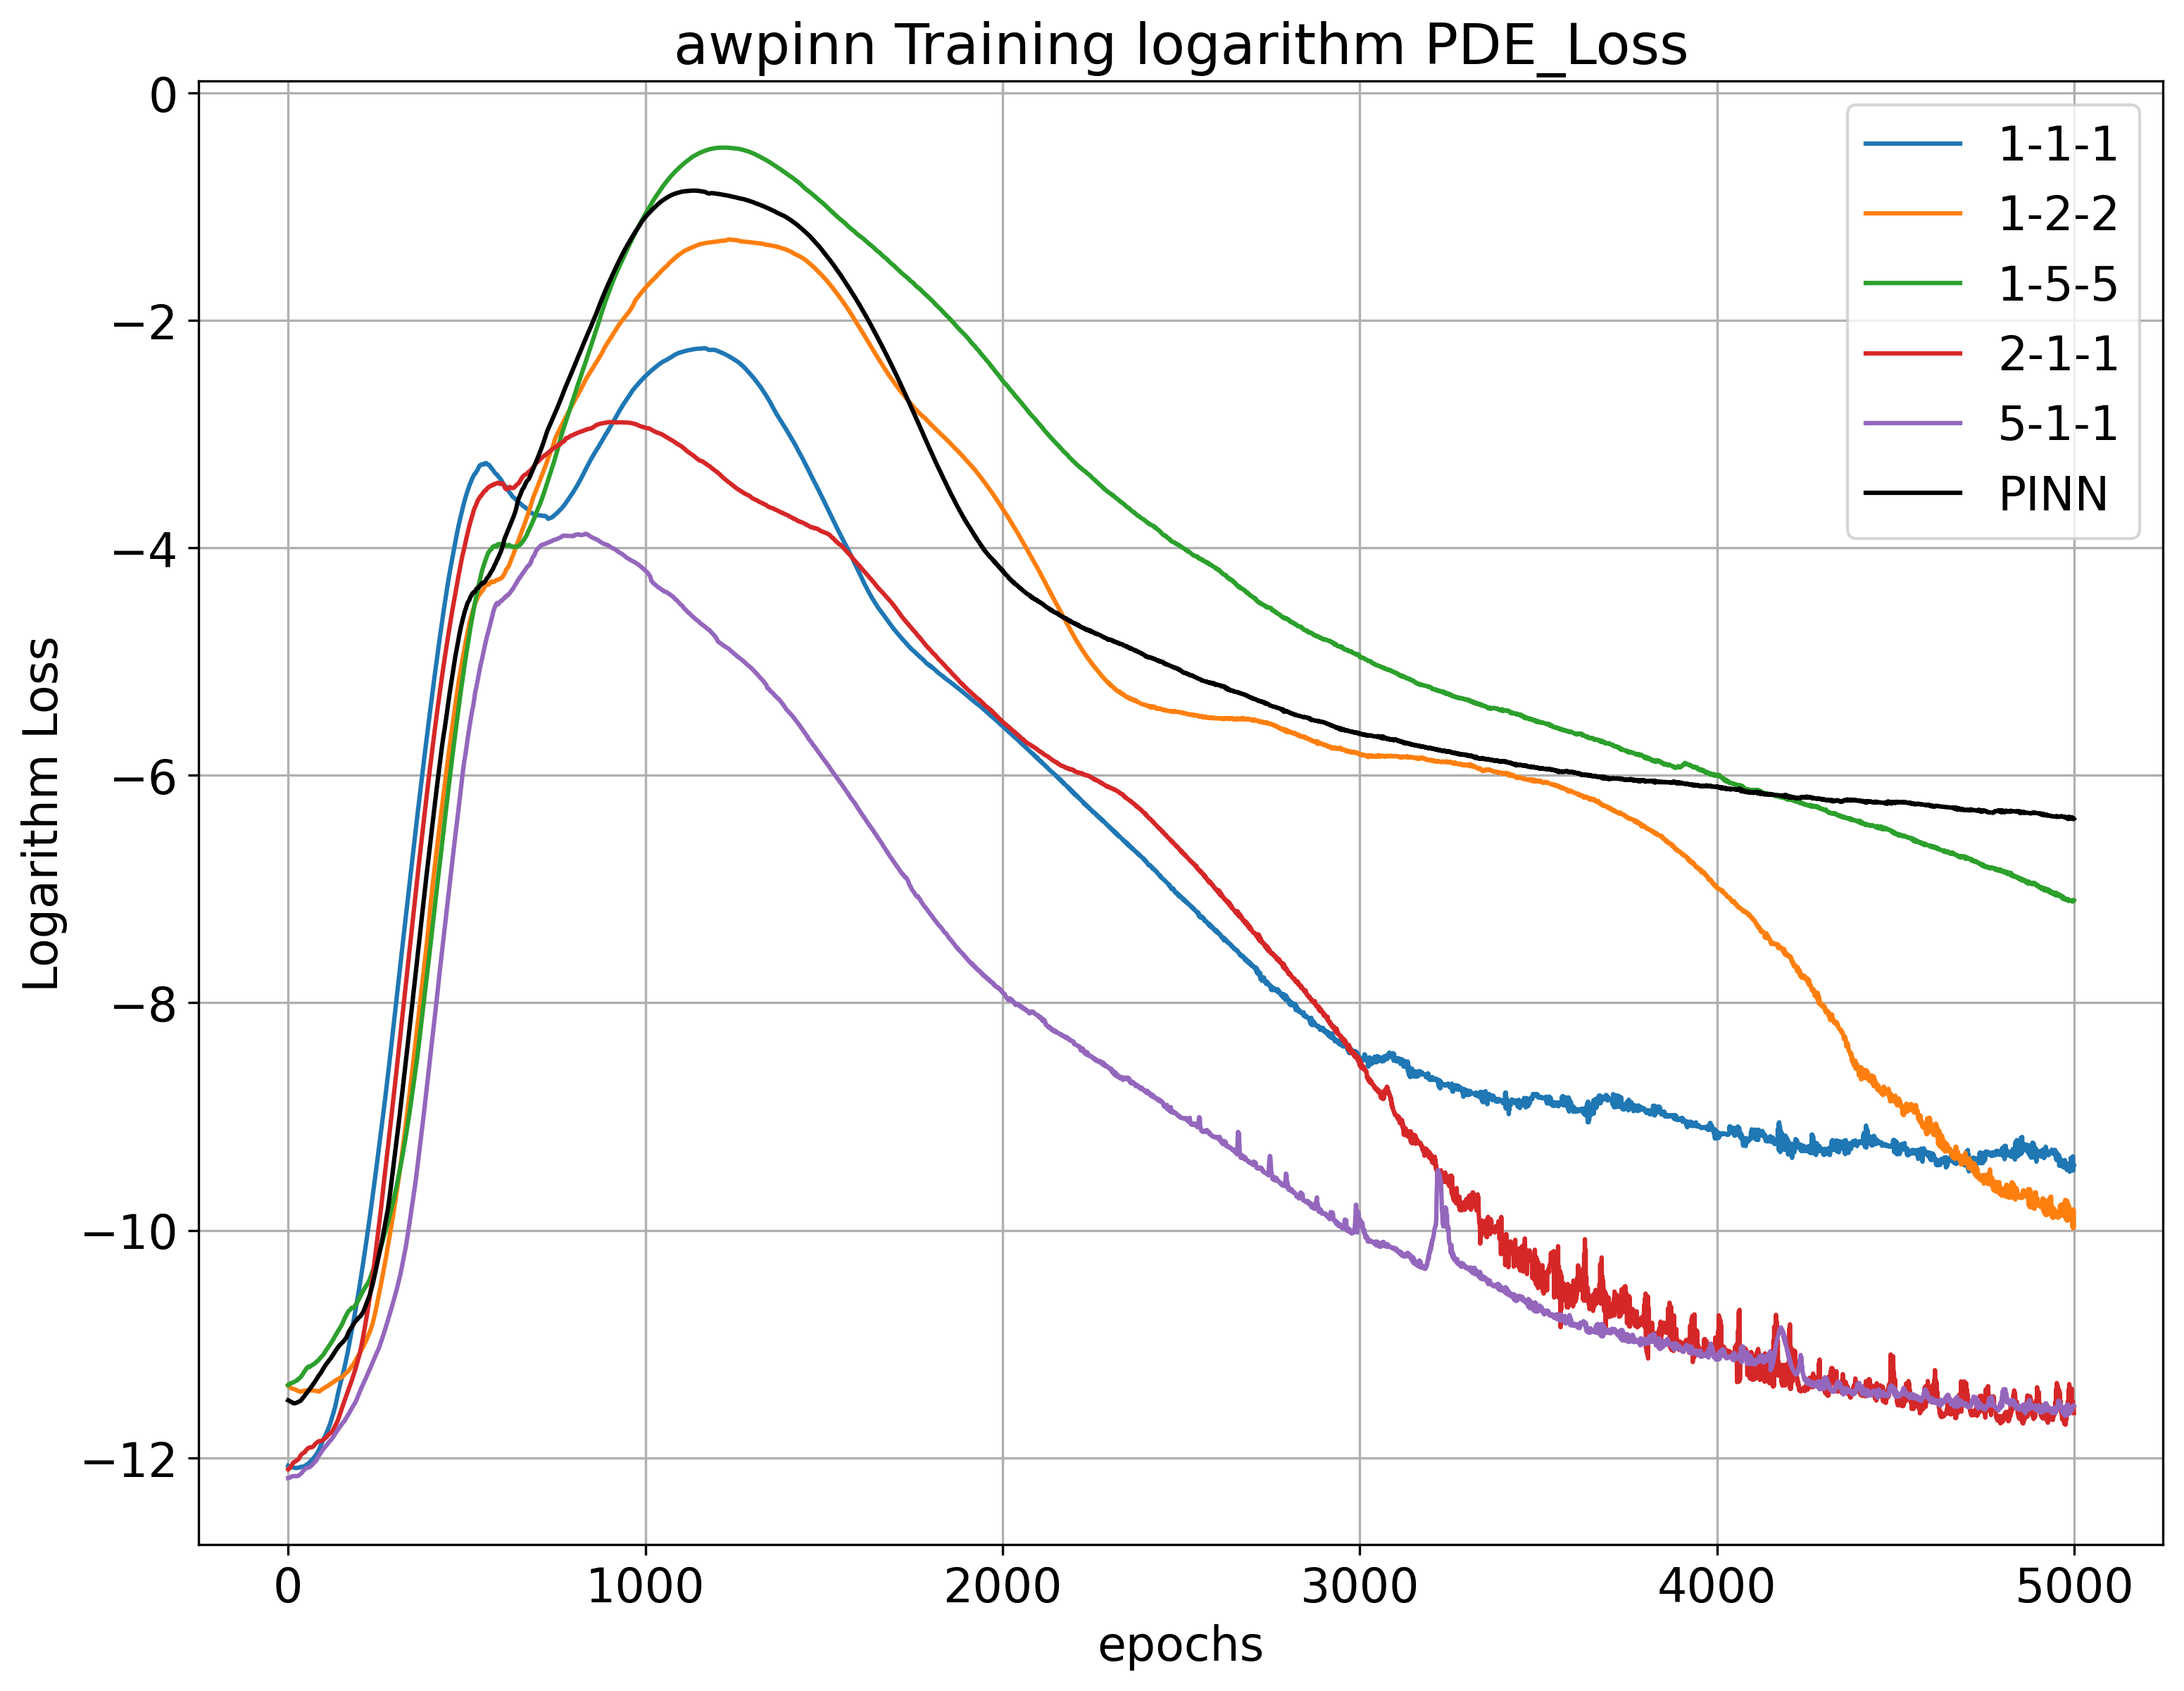

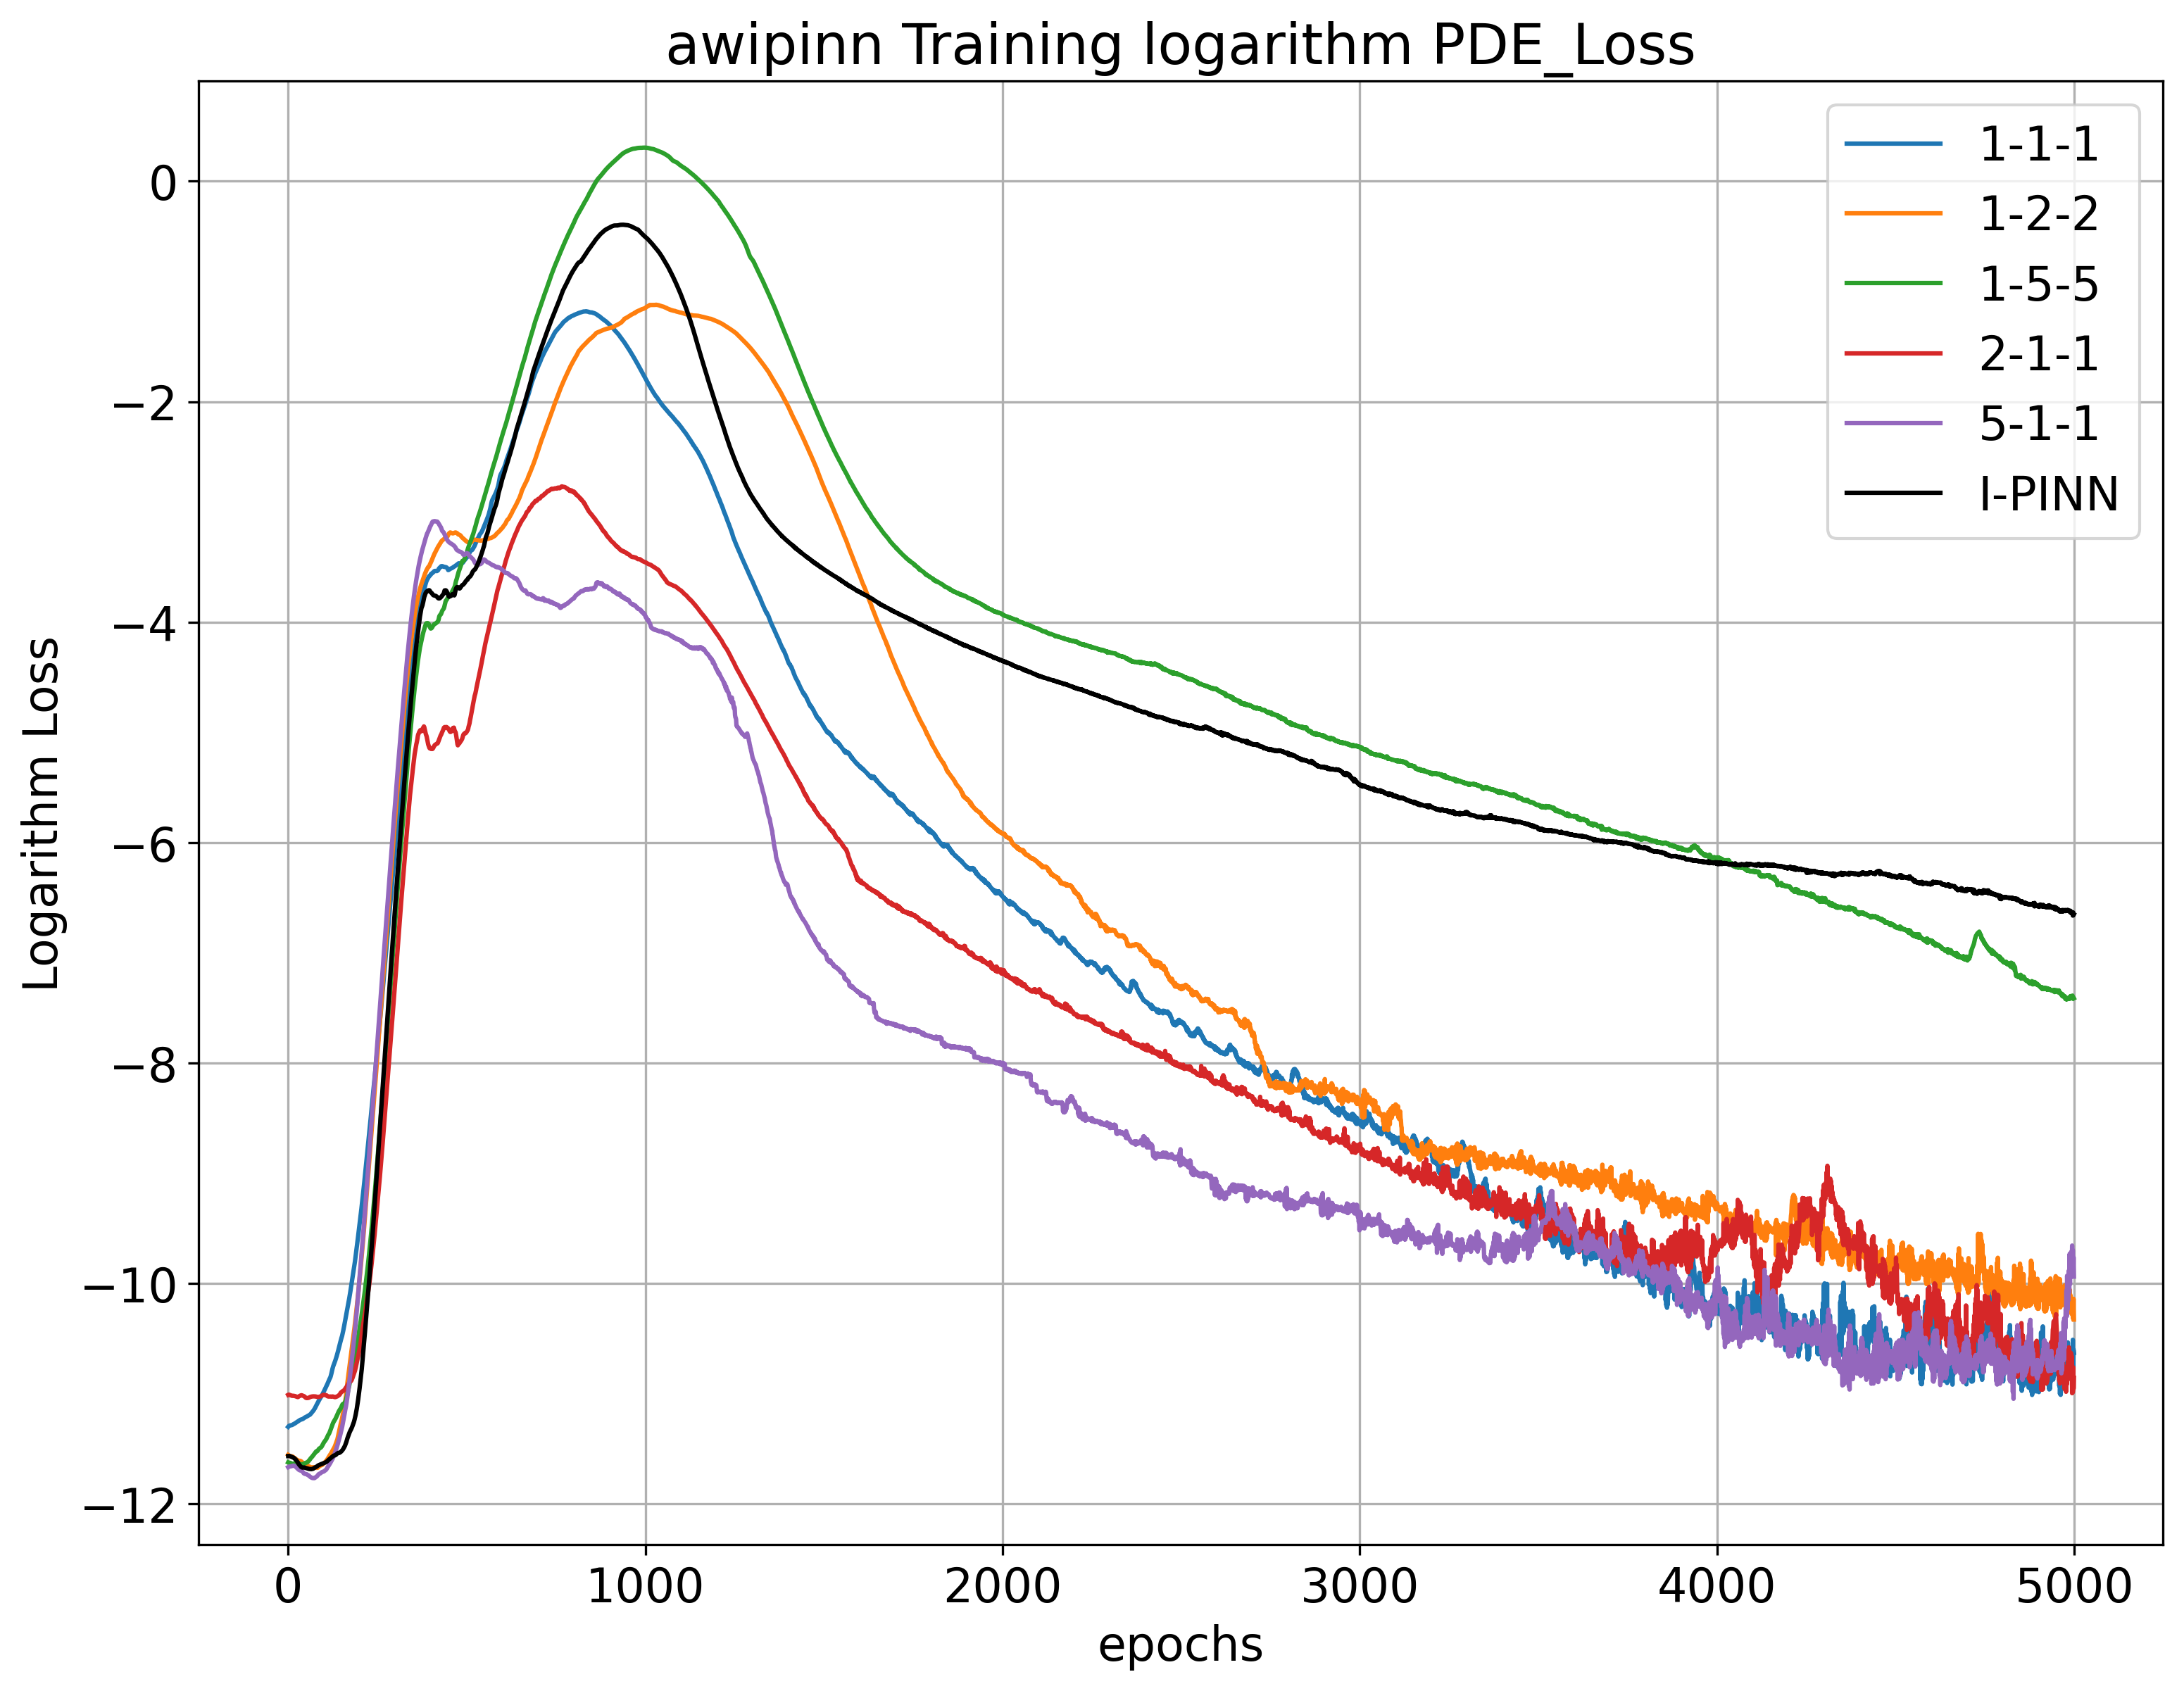

In [6]:
def load_and_plot(model_type, log_scale=False, additional_loss=None):
    fig = plt.figure(figsize=(12,9))
    
    for config, path in configs.items():
        loss_data = pd.read_csv(f'test_loss_weights/{model_type}/{path}/average.csv')[f'Average_{key}'].to_numpy()
        if log_scale:
            plt.plot(range(n_epochs), [np.log(item) for item in loss_data], label=config)
        else:
            plt.plot(range(800), loss_data[:800], label=config)
    
    if additional_loss:
        label, data = additional_loss
        if log_scale:
            plt.plot(range(n_epochs), [np.log(item) for item in data[:n_epochs]], label=label, color='black')
        else:
            plt.plot(range(800), data[:800], label=label, color='black')

    plt.xlabel('epochs')
    plt.ylabel('Logarithm Loss' if log_scale else 'Loss')
    plt.legend()
    plt.title(f'{model_type} Training {"logarithm " + key if log_scale else key}')
    plt.grid(True)
    # plt.savefig(f'test_loss_weights/plot/{model_type} Training {"logarithm " if log_scale else ""}{key}.png', bbox_inches='tight')
    plt.show()  # You can replace with save if needed

# AW-PINN plots
pinn_loss = ('PINN', pd.read_csv('test_final_performance/old_without_l2/pinn/average_loss.csv')[f'Average_{key}'].to_numpy())
load_and_plot('awpinn', log_scale=True, additional_loss=pinn_loss)
# load_and_plot('awpinn', log_scale=False, additional_loss=pinn_loss)

# AW-IPINN plots
ipinn_loss = ('I-PINN', pd.read_csv('test_final_performance/old_without_l2/ipinn/average_loss.csv')[f'Average_{key}'].to_numpy())
load_and_plot('awipinn', log_scale=True, additional_loss=ipinn_loss)
# load_and_plot('awipinn', log_scale=False, additional_loss=ipinn_loss)